In [1]:
# Pipeline for finding the CoM of each individual shot for ePix Runs 18-20
# Pipeline also plots every CoM value in a histogram
# Last ran 07/30/2025

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

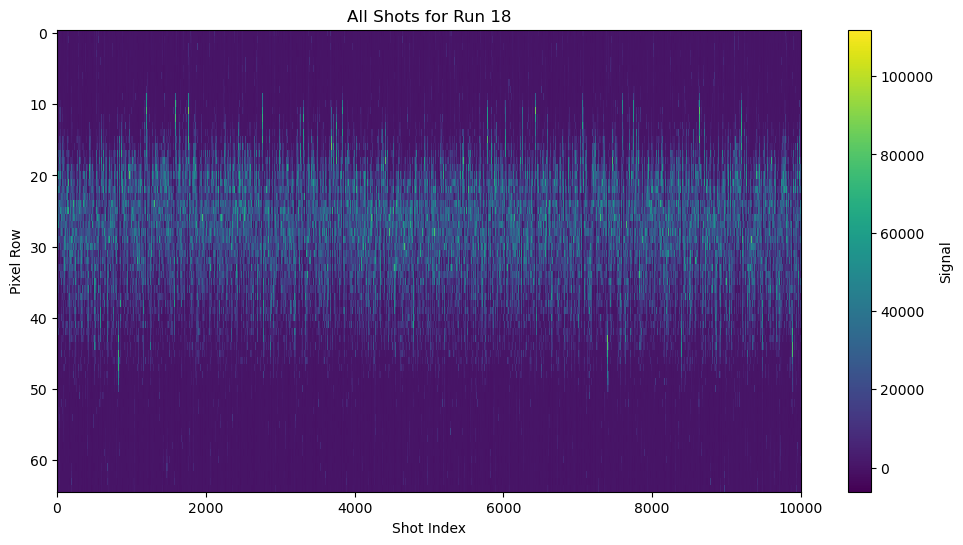

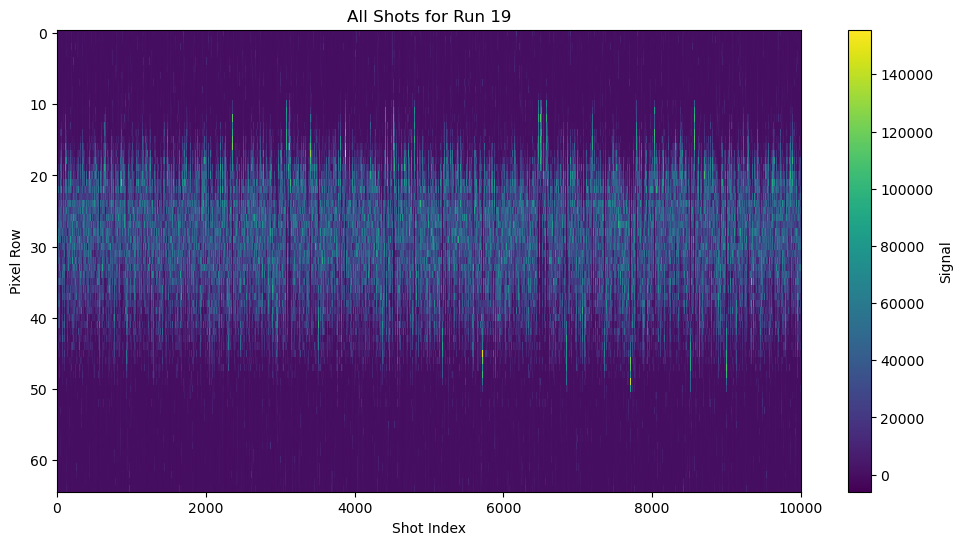

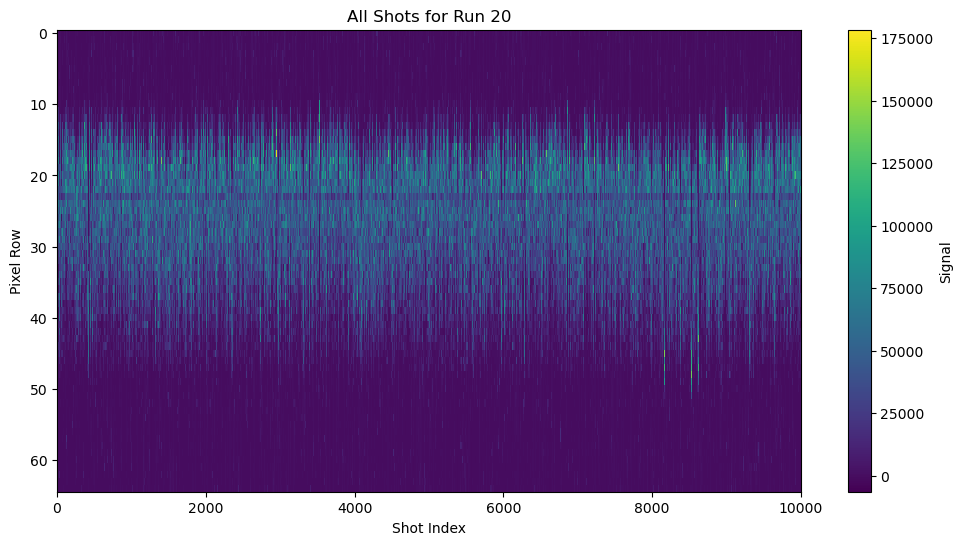

In [3]:
data_dir = '/sdf/group/rfar/timodo/ePix_Runs_Pixel_Sum_Data/'

runs = [18, 19, 20]
for run in runs:
    file_path = os.path.join(data_dir, f'run_{run}_all_sumY.npz')
    npz = np.load(file_path)
    sumY = npz["sumY"]

    fig, ax = plt.subplots(figsize=(12, 6))
    img = ax.imshow(np.transpose(sumY), aspect='auto', interpolation='nearest')
    plt.xlim([0, sumY.shape[0]])  # adjust according to actual shots count
    plt.xlabel('Shot Index')
    plt.ylabel('Pixel Row')
    plt.title(f'All Shots for Run {run}')
    plt.colorbar(img, ax=ax, label='Signal')
    plt.show()

In [4]:
com_dict = {}

for run in runs:
    file_path = os.path.join(data_dir, f'run_{run}_all_sumY.npz')
    npz = np.load(file_path)
    sumY = npz["sumY"]
    # Adapt to shape of sumY (N_shots, N_pixels)
    y_pixels = npz["y_pixels"] if "y_pixels" in npz else np.arange(sumY.shape[1])
    com_values = []
    for shot in sumY:
        total = np.sum(shot)
        com = np.nan if total == 0 else np.sum(shot * y_pixels) / total
        com_values.append(com)
    com_dict[run] = np.array(com_values)

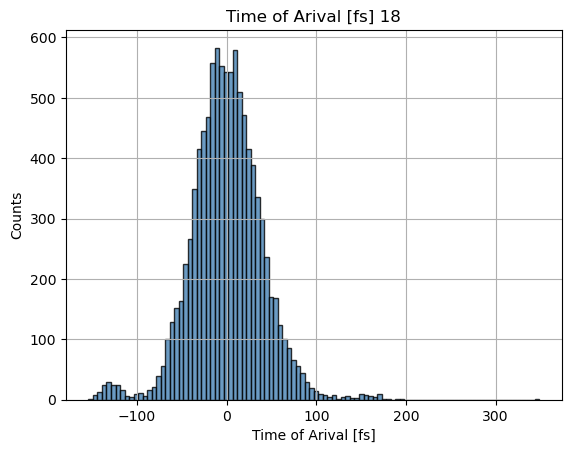

39.690332013893325
39.690332013893325


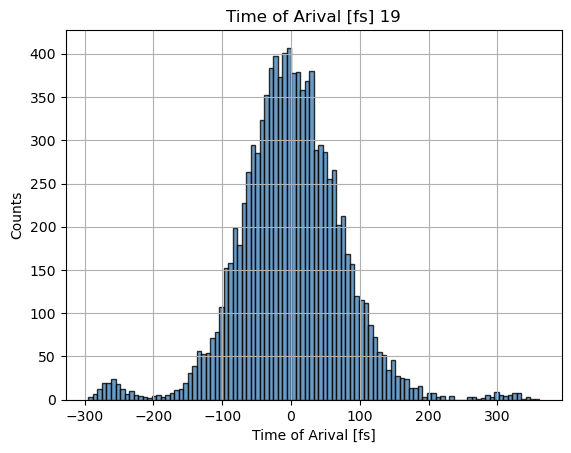

75.87578185350408
75.87578185350408


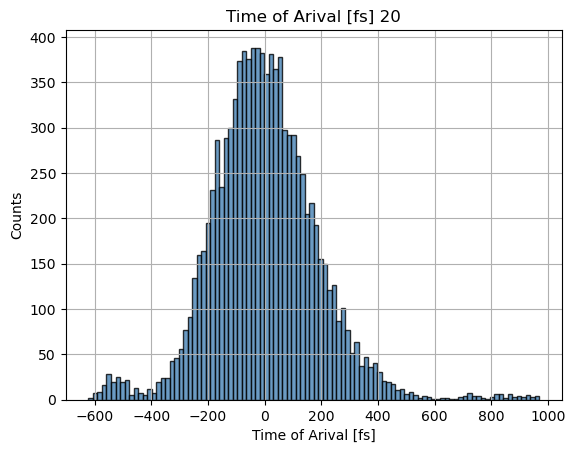

188.48745000916796
188.48745000916793


In [19]:
for run in runs:
    com_values = com_dict[run]
    valid_com = com_values[~np.isnan(com_values)]
    # Adjust decimal precision as needed, e.g., 0.01 for tight grouping
    if run==18:
        calibration=10
    elif run==19:
         calibration=20
    elif run ==20:
         calibration=50
        
    rounded_com = np.round((valid_com-np.mean(valid_com))*calibration, decimals=2)

    #plt.figure(figsize=(8,4))
    plt.hist(rounded_com, bins=100, color='steelblue', edgecolor='black', alpha=0.8)
    plt.xlabel('Time of Arival [fs]')
    plt.ylabel('Counts')
    plt.title(f'Time of Arival [fs] {run}')
    plt.grid(True)
    plt.show()
    print(np.sqrt(np.mean(((valid_com-np.mean(valid_com))*calibration)**2)))
    print(np.std(((valid_com-np.mean(valid_com))*calibration)))